# Objective
In this notebook, I am simply implementing one-vs-one models. Raw intruder data is used, however, in subsequent notebooks, SMOTE and gaussian noise methods will be implemented to preserve the privacy of the intruders. 

In [1]:
import codecs
import utility_functions_v2 as util
import one_vs_rest_util as ovr_util
import load_buffalo_data as data_loader
import cnn_lstm_models as models
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [2]:
import importlib
importlib.reload(data_loader)
importlib.reload(util)
importlib.reload(models)
importlib.reload(ovr_util)

<module 'one_vs_rest_util' from 'C:\\Users\\nyein\\Intership_proj\\keystroke_dynamics\\initial_testing_phase\\one_vs_rest_util.py'>

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input, Dropout,LSTM,TimeDistributed,GRU , Bidirectional,BatchNormalization,Activation
from tensorflow.keras.models import  Sequential, Model, load_model
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix
from collections import Counter
from tensorflow.keras import backend as K
from sklearn.metrics import roc_auc_score

## 1. Setting up experiment settings

In [4]:
seq_length = 30
cnn_units = 35
lstm_units = 20
weight_decay = 1e-6
batch_size = 64
epochs = 150
multi_class_labels = 5
num_features = 4
optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0001)
loss_func = "binary_crossentropy"
multi_class_loss = "categorical_crossentropy"
early_stopping,learning_rate_reduction = models.get_call_backs()

In [5]:
user_id = "005"
intruder_id_list = ["080","083","017","019"]

## 2. Multi-class classification

In [6]:
train_data, train_label, scaler = ovr_util.load_multi_class_train_data(user_id,intruder_id_list,seq_length)
test_data, test_label = ovr_util.load_multi_class_test_data(user_id, intruder_id_list, scaler, seq_length)

not found!! popping from list
not found!! popping from list
not found!! popping from list
not found!! popping from list
Multi-class Train data shape: (54043, 30, 4, 1), Multi-class Train label shape: (54043, 5)
Multi-class Test data shape: (2500, 30, 4, 1), Multi-class Test label shape: (2500, 5)


### 2.1 Training

CNN LSTM for multiclass- classification- CNN units: 32 , LSTM units: 120 
Train on 40532 samples, validate on 13511 samples
Epoch 1/150
40532/40532 [==============================] - 13s 330us/sample - loss: 1.2131 - acc: 0.4549 - val_loss: 1.2148 - val_acc: 0.4225
Epoch 2/150
40532/40532 [==============================] - 8s 186us/sample - loss: 0.9145 - acc: 0.6006 - val_loss: 0.7403 - val_acc: 0.6900
Epoch 3/150
40532/40532 [==============================] - 7s 185us/sample - loss: 0.7422 - acc: 0.6854 - val_loss: 0.6423 - val_acc: 0.7279
Epoch 4/150
40532/40532 [==============================] - 8s 186us/sample - loss: 0.6197 - acc: 0.7404 - val_loss: 0.5046 - val_acc: 0.7950
Epoch 5/150
40532/40532 [==============================] - 8s 186us/sample - loss: 0.5415 - acc: 0.7766 - val_loss: 0.4342 - val_acc: 0.8192
Epoch 6/150
40532/40532 [==============================] - 7s 185us/sample - loss: 0.4879 - acc: 0.7986 - val_loss: 0.4729 - val_acc: 0.8016
Epoch 7/150
40532/40532 [====

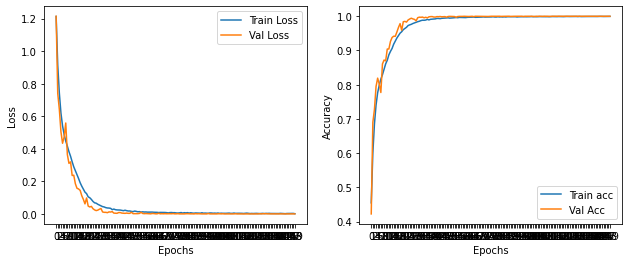

In [7]:
multi_class_model = models.build_cnn_lstm_model_multiclass(LSTM, False, cnn_units, lstm_units, 0.3, (seq_length,num_features,1), multi_class_labels)
multi_class_history = models.train_model(multi_class_model, optimizer, multi_class_loss, epochs, batch_size, train_data, train_label, [early_stopping], ["acc"])

### 2.2 Testing

In [ ]:
(y_pred,y_true), (tn, fp, fn, tp), (FAR,FRR,EER) = models.multi_class_testing(multi_class_model, test_data, test_label, user_id)

## 3. Multi-class classification - with noise

In [9]:
noisy_train_data, noisy_train_label, scaler_2 = ovr_util.load_multi_class_train_data(user_id, intruder_id_list, seq_length,True)
noisy_test_data, noisy_test_label = ovr_util.load_multi_class_test_data(user_id, intruder_id_list, scaler_2, seq_length,True)

not found!! popping from list
not found!! popping from list
not found!! popping from list
not found!! popping from list
Multi-class Train data shape: (54043, 30, 4, 1), Multi-class Train label shape: (54043, 5)
Multi-class Test data shape: (2500, 30, 4, 1), Multi-class Test label shape: (2500, 5)


### 3.1 Training

CNN LSTM for multiclass- classification- CNN units: 32 , LSTM units: 120 
Train on 40532 samples, validate on 13511 samples
Epoch 1/150
40532/40532 [==============================] - 12s 300us/sample - loss: 1.2973 - acc: 0.4083 - val_loss: 1.1272 - val_acc: 0.5168
Epoch 2/150
40532/40532 [==============================] - 8s 187us/sample - loss: 1.1223 - acc: 0.4916 - val_loss: 0.9652 - val_acc: 0.5680
Epoch 3/150
40532/40532 [==============================] - 8s 187us/sample - loss: 1.0494 - acc: 0.5333 - val_loss: 0.9072 - val_acc: 0.6035
Epoch 4/150
40532/40532 [==============================] - 8s 187us/sample - loss: 1.0016 - acc: 0.5552 - val_loss: 0.9011 - val_acc: 0.6014
Epoch 5/150
40532/40532 [==============================] - 8s 187us/sample - loss: 0.9602 - acc: 0.5793 - val_loss: 0.8334 - val_acc: 0.6447
Epoch 6/150
40532/40532 [==============================] - 8s 186us/sample - loss: 0.9299 - acc: 0.5904 - val_loss: 0.7803 - val_acc: 0.6600
Epoch 7/150
40532/40532 [====

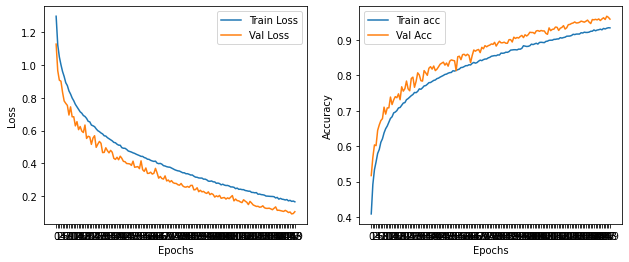

In [10]:
multi_class_model_with_noise = models.build_cnn_lstm_model_multiclass(LSTM, False, cnn_units, lstm_units, 0.3, (seq_length,num_features,1), multi_class_labels)
multi_class_history_with_noise = models.train_model(multi_class_model_with_noise, optimizer, multi_class_loss, epochs, batch_size, noisy_train_data, noisy_train_label, [early_stopping], ["acc"])

### 3.2 Testing

In [11]:
(y_pred_2,y_true_2), (tn_2, fp_2, fn_2, tp_2), (FAR_2,FRR_2,EER_2) = models.multi_class_testing(multi_class_model_with_noise, noisy_test_data, noisy_test_label, user_id)

user index: 0
user label: [1, 0, 0, 0, 0]
TN:    1982,    FP:   18,   FN:   182,   TP:   318
FAR:   0.009,   FRR:   0.364,   EER:   0.26863468634686494
